---

✍ С общими представлениями о модели дерева решений мы знакомились, когда изучали задачу классификации *(ML-3. Обучение с учителем: классификация)*. Это неслучайно, ведь изначально деревья решений создавались именно для решения этой задачи. Чуть позднее оказалось, что алгоритм может быть запросто адаптирован и для решения задач регрессии.

В этом модуле мы будем рассматривать деревья решений параллельно в контексте задач классификации и регрессии. Демонстрация работы алгоритма на обеих задачах позволит нам посмотреть на картину в целом и наглядно покажет сходства и различия моделей. Забегая вперёд, скажем, что алгоритмы построения дерева решений для задач классификации и регрессии отличаются лишь в паре шагов.

Для начала мы посмотрим, что вообще представляет собой обученное дерево решений, и заодно закрепим «древесную» терминологию, с которой знакомились ранее, — она будет нас сопровождать на протяжении всего модуля.

Так как мы находимся в разделе **MATH&ML**, то и говорить будем на строгом математическом языке, но при этом будем сопровождать свои рассуждения переводом на «человеческий».

---

Начнём с постановки задачи машинного обучения — для этого рассмотрим конкретный пример, а затем обобщим его с помощью математического аппарата.

---

У нас есть набор из 500 объектов, которые описываются пятью какими-то характеристиками. Например, это могут быть 500 пациентов, у которых измерили пять медицинских параметров: вес, рост, давление, количество лейкоцитов в крови и уровень сахара.

В паре с объектом всегда идёт целевая переменная, которую необходимо научиться предсказывать. Например, целевой переменной может быть признак болезни: 1 — болен диабетом, 0 — не болен диабетом.

**Наша цель** — построить модель машинного обучения, которая на основе характеристик объекта предсказывает целевую переменную. Для нашего примера это будет модель, которая на основе медицинских параметров выдаёт свой прогноз о наличии у пациента диабета.

*Это была классическая постановка задачи машинного обучения в свободной форме. Давайте теперь посмотрим, как будет выглядеть та же самая задача на языке математики.*

**Примечание.** Далее для простоты изложения и упрощения обозначений мы не будем писать стрелки над векторами. Если какая-то переменная будет являться векторной, мы будем указывать на это в явном виде.

Постановка задачи машинного обучения может выглядеть по-разному. Например, когда мы разбирали линейные модели в модулях по линейной алгебре, мы давали постановку задачи на языке линейной алгебры. От нас требовалось линейно выразить целевой вектор $y$ через векторы-факторы $x_j$. 

В контексте разговора о деревьях нам будет удобнее использовать не чистый аппарат линейной алгебры, а совместить его с теорией множеств.

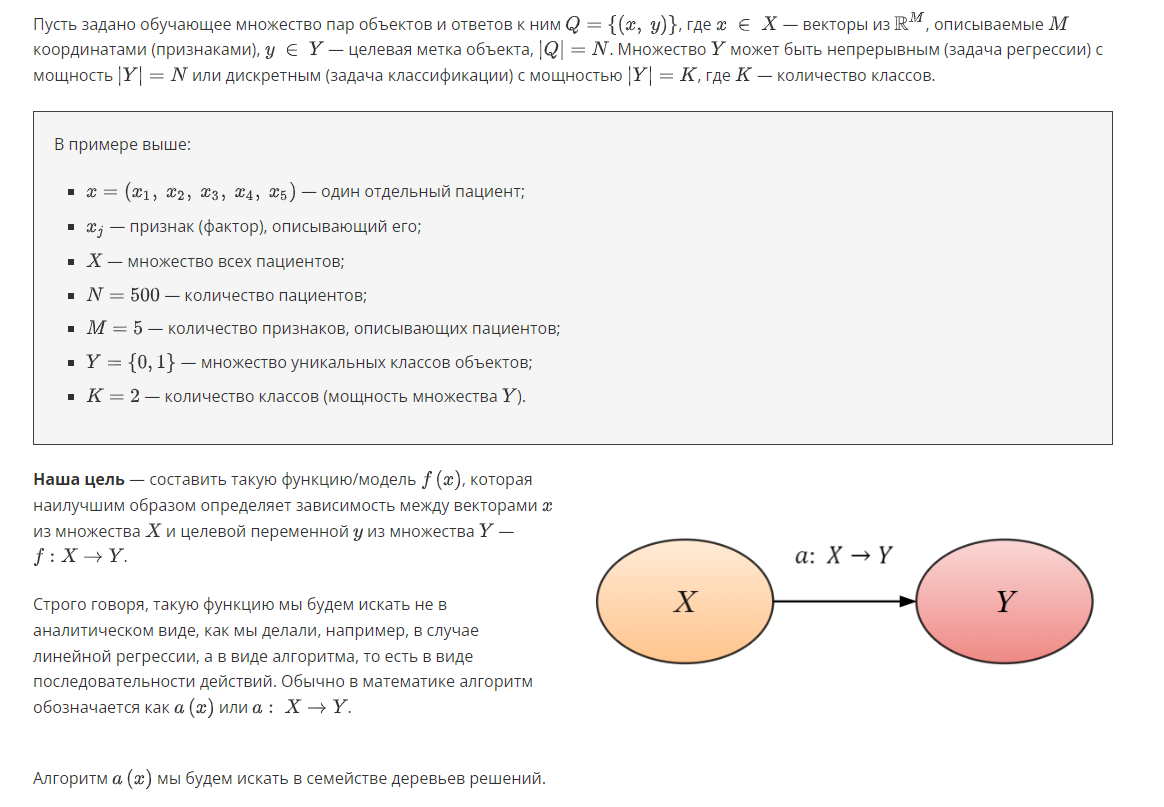

# **ОПРЕДЕЛЕНИЕ РЕШАЮЩЕГО ДЕРЕВА**

## Если говорить простыми словами, **обученное дерево решений** — это последовательность вопросов, которые задаются поступающим на его вход объектам.

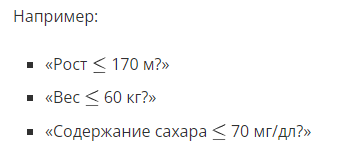

В зависимости от того, выполняется ли заданное в вопросе условие, объект переходит к одному из следующих вопросов, и так происходит до тех пор, пока не будет получен конечный результат — прогноз дерева решений для данного объекта. Всё это очень напоминает стандартные рассуждения по принципу «если…, то».

В качестве примера дерева решений в текстовом виде приведём процесс принятия решения о том, куда поехать в отпуск.

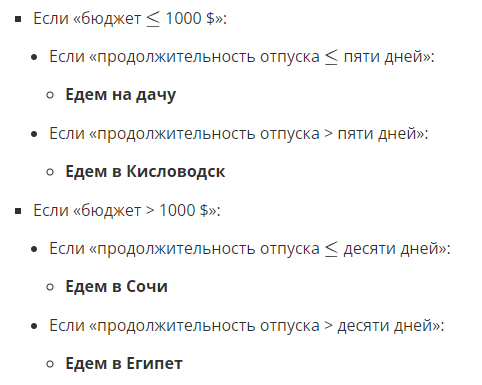

Последовательность вопросов можно оформить в виде вершин графа, структура которого будет напоминать перевёрнутое дерево.

### Пройдя путь, который зависит от характеристик объекта, через последовательность от первого вопроса (корня дерева) до финального ответа (листа) мы можем определить значение целевой переменной. В задаче регрессии финальный ответ дерева — некоторое число, а в задаче классификации — класс объекта.

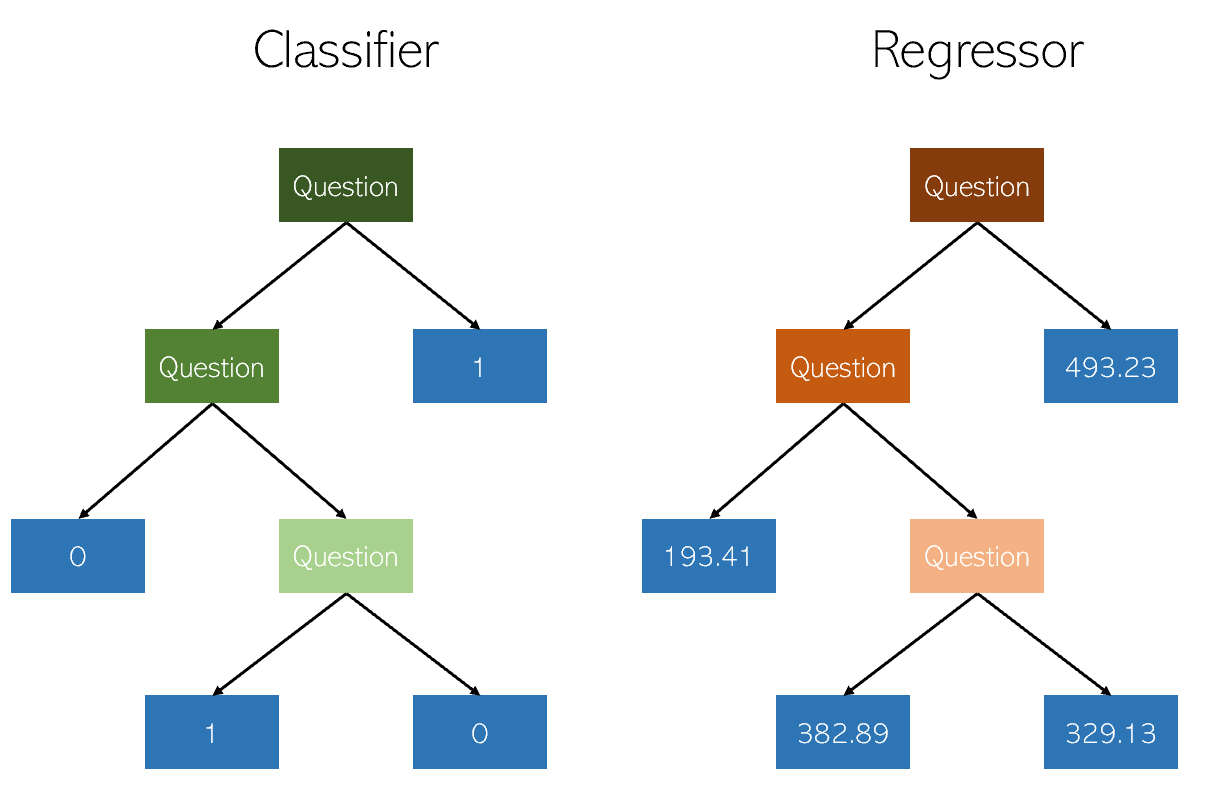

Давайте переведём вышесказанное на более формальный язык математики, на котором, собственно, и работает программная реализация дерева решений.

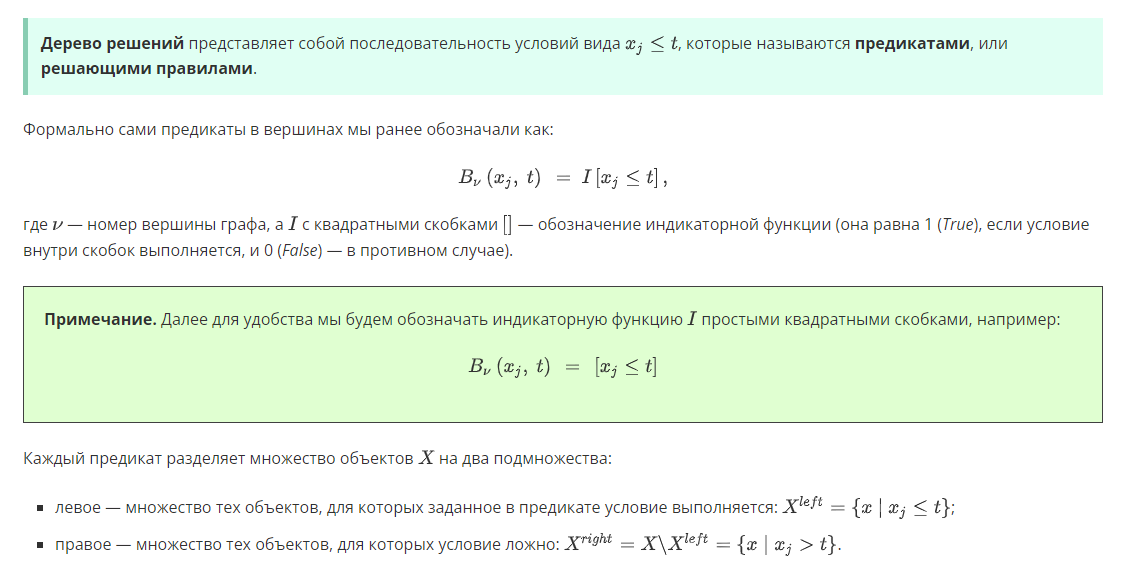

Последовательность предикатов лучше всего представлять в виде **ациклического связного графа**. 

Давайте посмотрим на пример такого графа для дерева решений глубиной 4. Дерево решает задачу классификации 15 наблюдений (мощность множества $X$) на три класса (мощность множества $Y$):

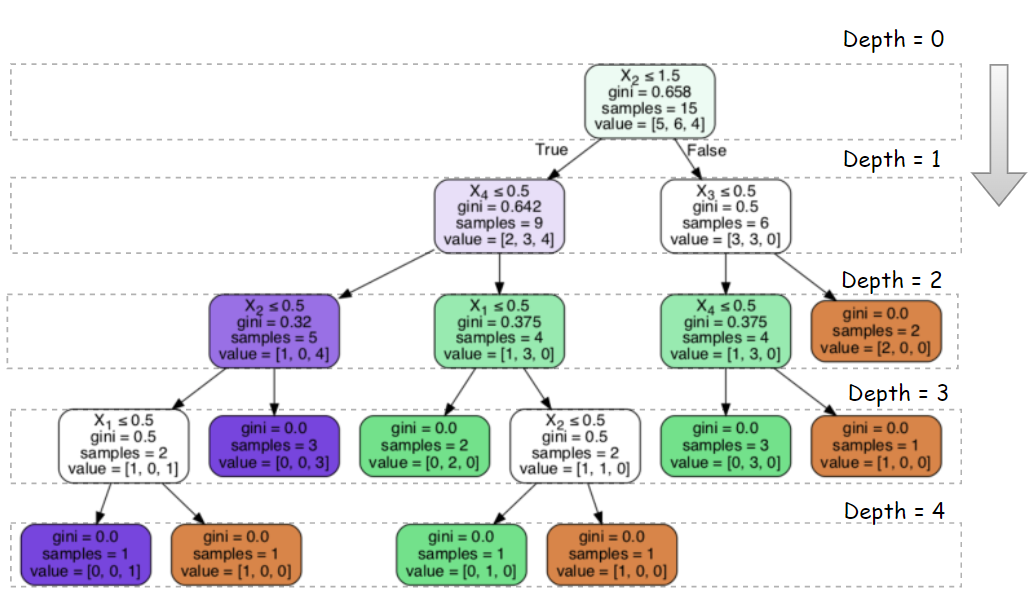

**Примечание.** Информация, указанная в вершинах графа, определяется во время обучения дерева решений, о процедуре которого мы поговорим в следующих юнитах:

+ $x_j <= t$ — условие предиката;
+ gini — значение критерия информативности (в данном случае используется критерий Джини);
+ samples — число объектов из обучающей выборки, попавших в вершину;
+ value — число объектов каждого из классов из обучающей выборки, попавших в вершину.

В построенном графе выделяют **три типа вершин**:

+ корневая вершина (*root node*) — то, откуда всё начинается;
+ внутренние вершины (*intermediate nodes*);
+ листья (*leafs*) — конечные вершины дерева, в которых определяется конечный «ответ» — прогноз дерева решений.

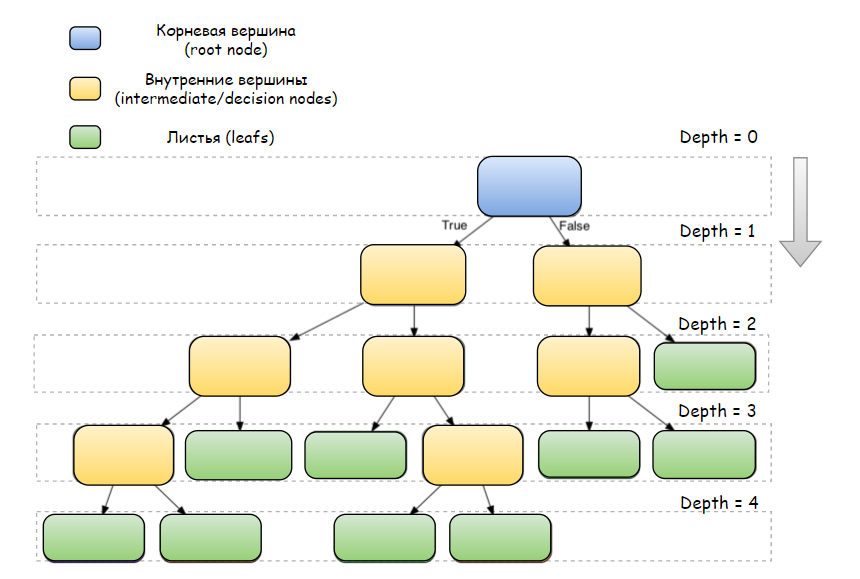


Вершины графа группируются в уровни, которые называются **глубиной дерева (depth)**. Отсчёт уровней ведётся с 0 (то есть корневая вершина не считается при подсчёте глубины дерева).

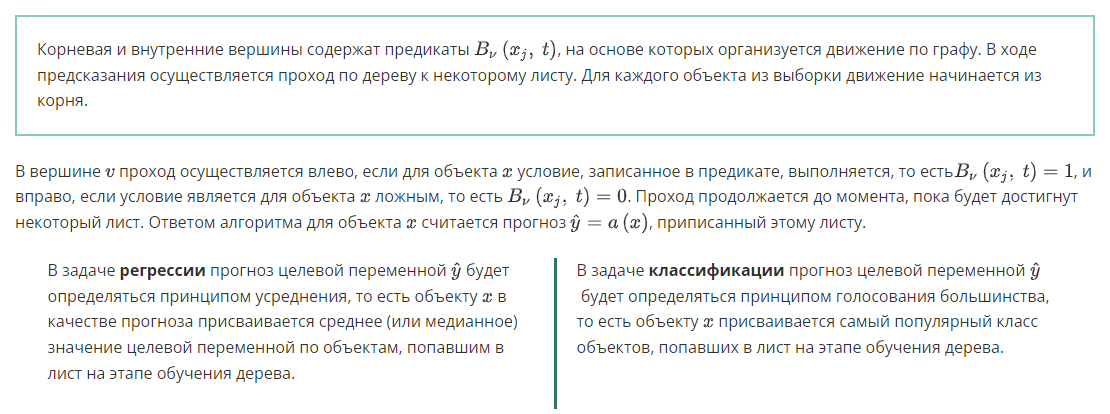



Давайте посмотрим, как введённые нами математические обозначения работают на **примере** построенного графа ↓

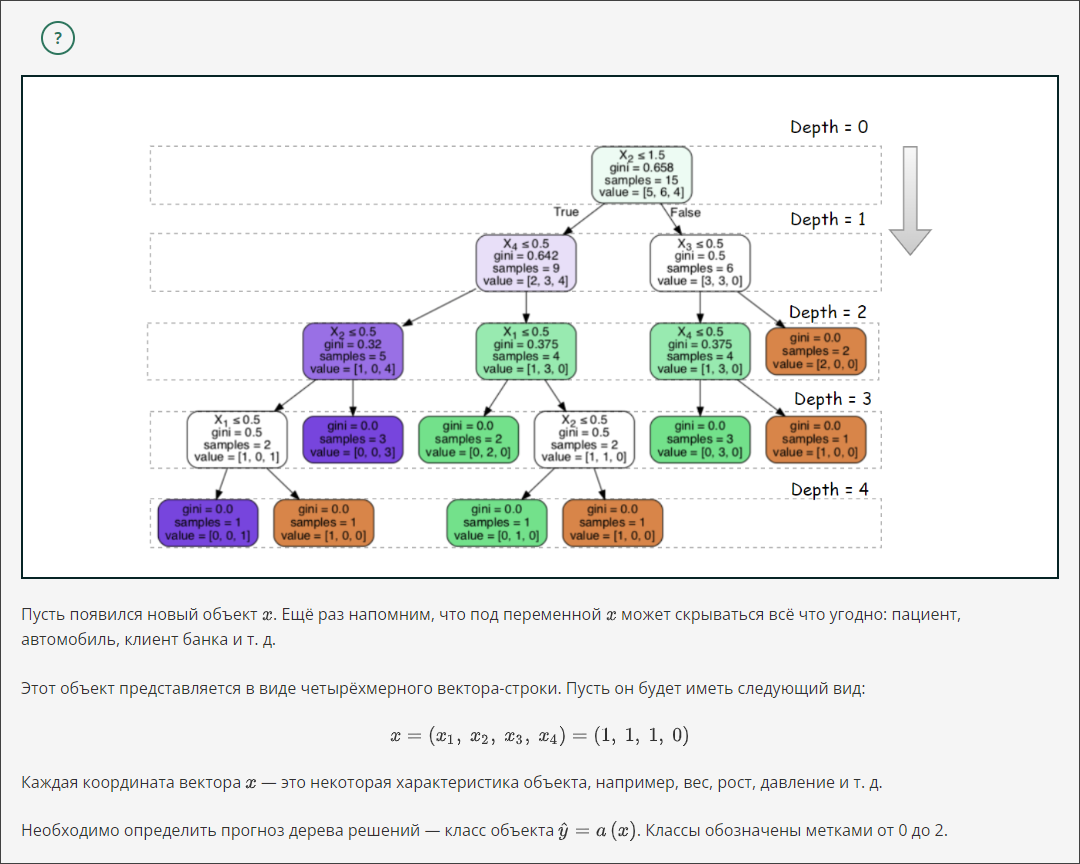



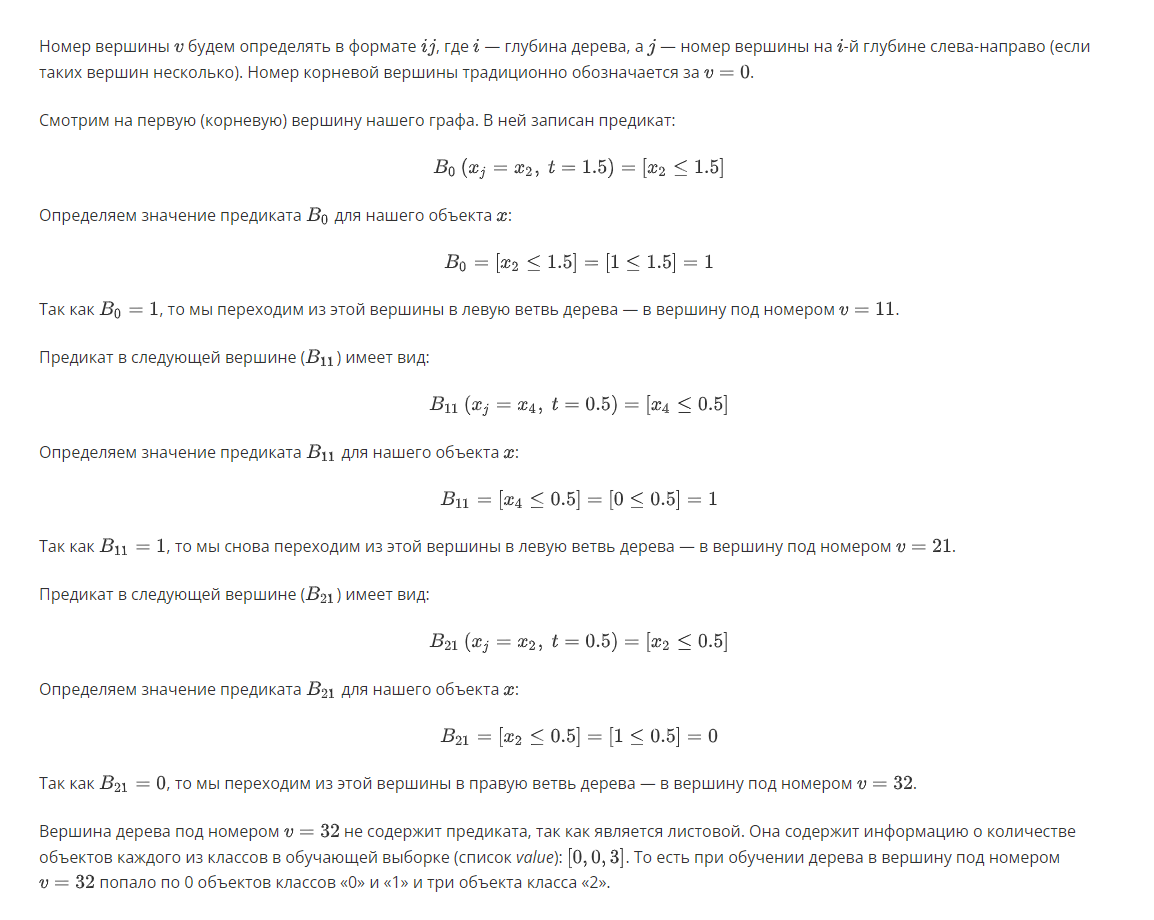

Можно визуализировать наш путь по графу:

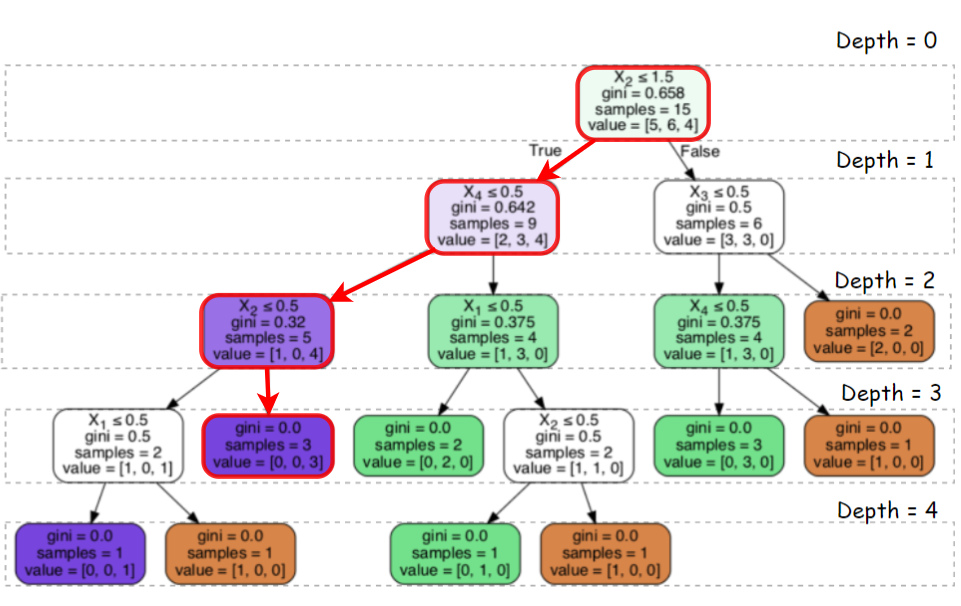

Класс объекта будет определён как наиболее популярный в конечной вершине, то есть:

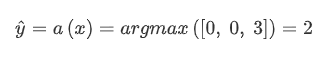

## Задание 2.1

Как называются конечные вершины графа дерева решений, в которых формируются предсказания алгоритма?

+ Листья

## Задание 2.2

Как формируется предсказание дерева решений для конкретного объекта в случае задачи классификации?

+ Объекту присваивается самый популярный класс объектов, попавших в лист на этапе обучения дерева.

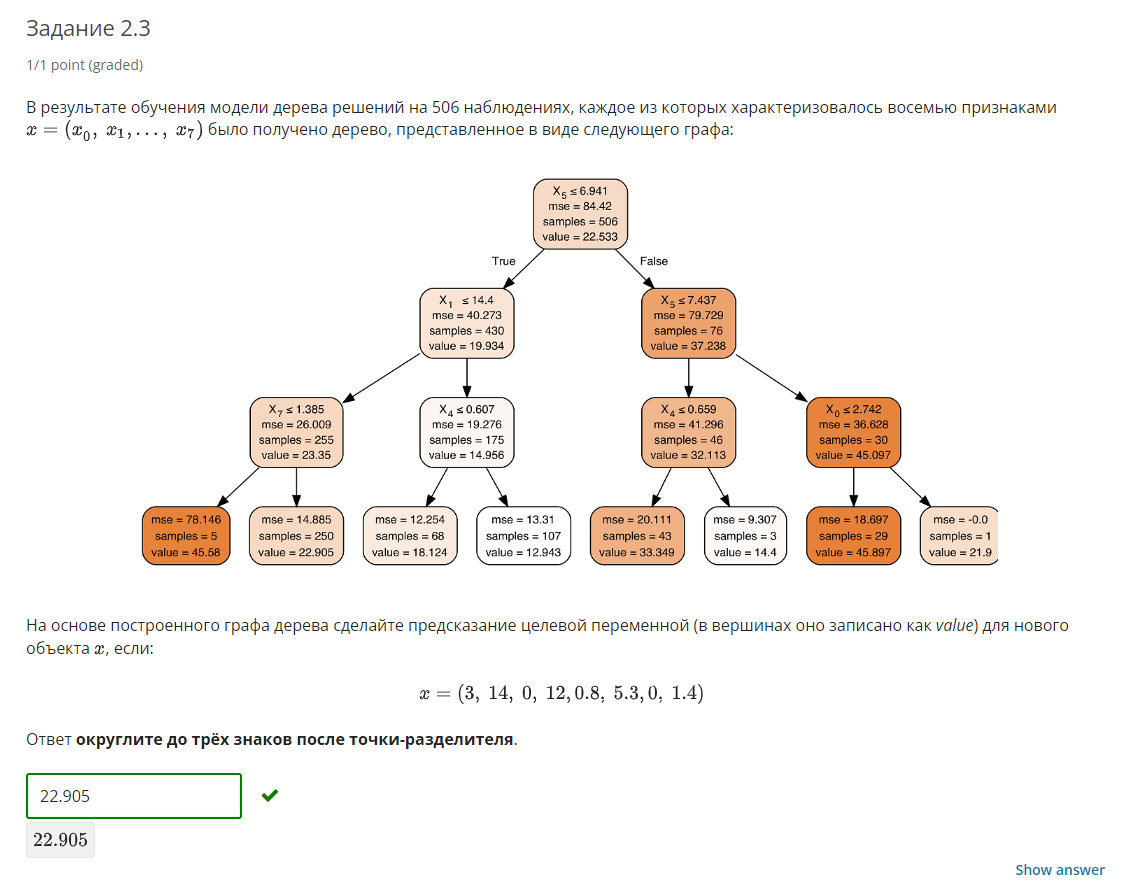

# **ГЕОМЕТРИЧЕСКАЯ ИНТЕРПРЕТАЦИЯ ДЕРЕВА РЕШЕНИЙ**

Теперь поговорим о том, что значит решить задачу регрессии/классификации с помощью дерева решений с точки зрения геометрии.

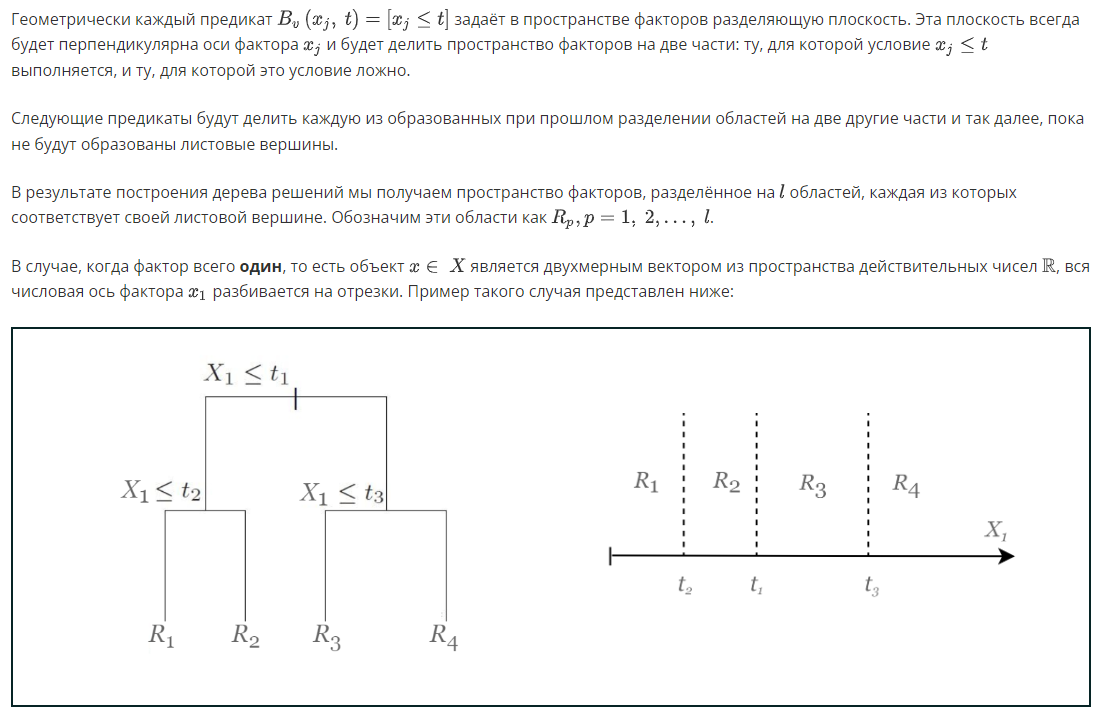

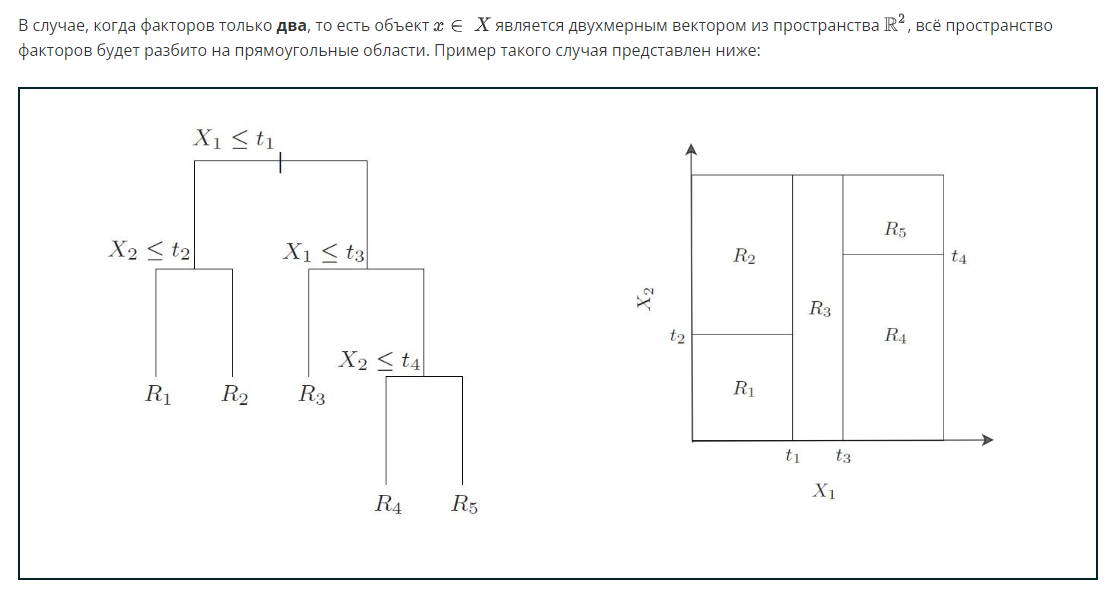

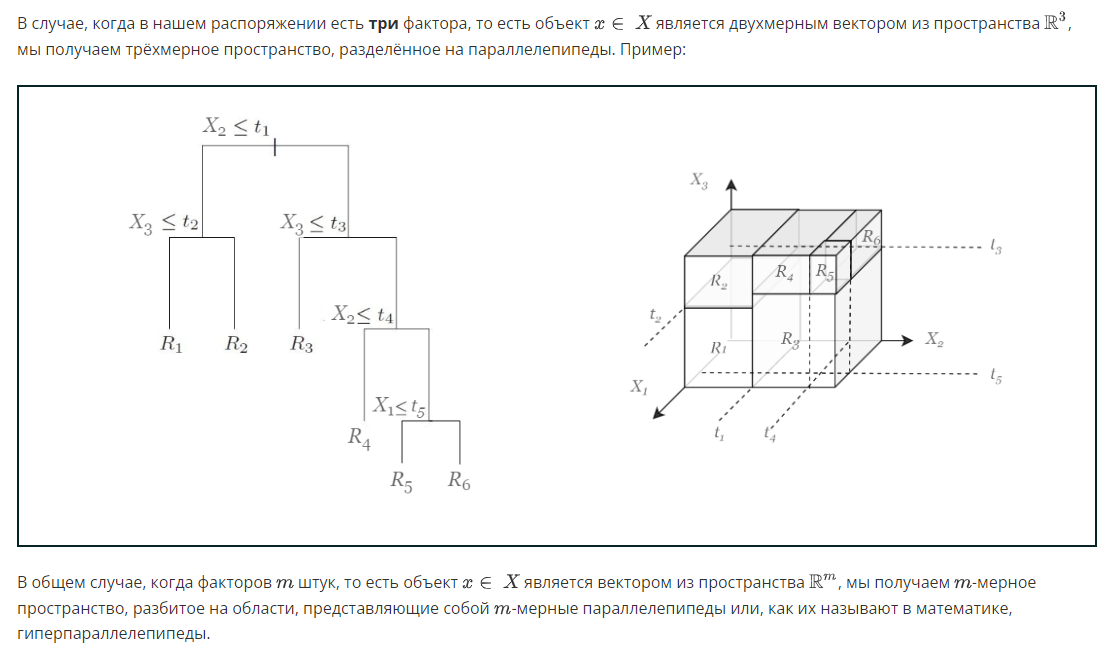

### **В случае задачи регрессии (*Decision Tree Regressor*)** ответ модели (значение целевого признака) будет определяться как среднее значение целевой переменной $y$ внутри области $R_p$, соответствующей листовой вершине. Математически это записывается следующим образом:

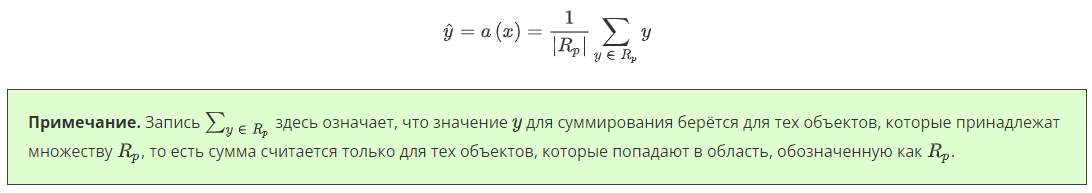



Давайте посмотрим на пример разделяющей поверхности дерева решений в случае задачи регрессии ↓

Воспользуемся данными о недвижимости в штате Айова из Ames Housing Dataset. Это классическая задача предсказания цены недвижимости, которую мы уже решали не раз с различными датасетами.

Для примера визуализации из всех признаков, описывающих объекты недвижимости, мы выберем:

+ Lot_Frontage — ширина фасада;
+ Lot_Area — площадь объекта недвижимости.

Необходимо предсказать стоимость недвижимости (Sale_Price)

Для начала импортируем необходимые библиотеки:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import tree

Как обычно, подготовим обучающую выборку, отделив факторы X и целевую переменную y:

**Примечание.** Для более понятной визуализации перед построением дерева уберём из датасета объекты с Lot_Frontage > 150 и с Lot_Area > 20000.


In [2]:
# Создаём обучающую выборку
ames_data = pd.read_csv('data/AmesHousing.csv')
ames_data = ames_data[(ames_data['Lot Frontage'] <=150) & (ames_data['Lot Area'] <=20000)]
X = ames_data[['Lot Frontage', 'Lot Area']]
y = ames_data['SalePrice']

Создадим модель дерева решений для задачи регрессии с максимальной глубиной 3 и обучим её. Напомним, что в sklearn за реализацию дерева решений для задачи регрессии отвечает класс DecisionTreeRegressor из модуля tree.

In [3]:
# Инициализируем модель дерева решений с максимальной глубиной 3 и обучаем её
dt_reg = tree.DecisionTreeRegressor(max_depth=3)
dt_reg.fit(X.values, y)

DecisionTreeRegressor(max_depth=3)

Отследить, как дерево решений строит свой прогноз, нам может помочь граф обученного дерева решений. Напомним, что за его визуализацию в библиотеке sklearn отвечает функция plot_tree() из модуля tree.

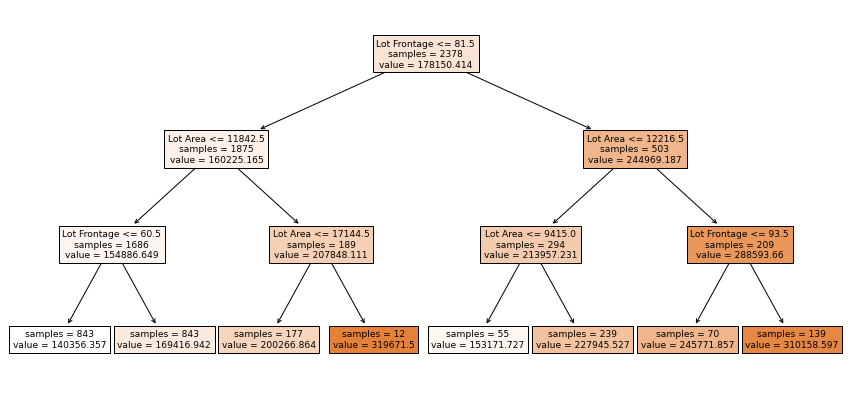

In [4]:
# Визуализируем дерево решений в виде графа
fig = plt.figure(figsize=(15, 7))
tree_graph = tree.plot_tree(
    dt_reg, #дерево решений 
    feature_names=X.columns, #имена факторов
    filled=True, #расцветка
    impurity=False, #отображать ли неоднородность
);


Построим диаграмму рассеяния и визуализируем то, как дерево решений разделяет пространство факторов на прямоугольные области. Для этого шага мы реализовали функцию plot_decision_bound_regression():

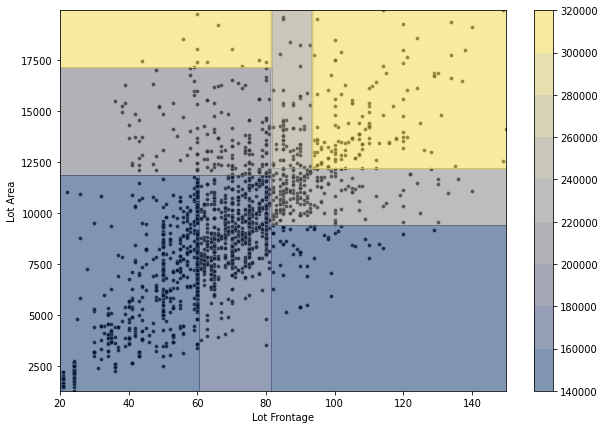

In [5]:
def plot_decision_bound_regression(X, y, model, fig):
    xx1, xx2 = np.meshgrid(
        np.arange(X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1, 1),
        np.arange(X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1, 1)
    )
    X_net = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])
    y_pred = model.predict(X_net)
    y_pred = y_pred.reshape(xx1.shape)
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], s=15, color='black', alpha=0.8)
    contour = plt.contourf(xx1, xx2, y_pred, 10, cmap='cividis', alpha=0.5)
    fig.colorbar(contour)

# Визуализируем разделяющую поверхность дерева решений
fig = plt.figure(figsize = (10, 7))
plot_decision_bound_regression(X, y, dt_reg, fig)

Что мы здесь видим? В результате построения дерева решений было образовано восемь областей ($R_1, R_2,...,R_8$), соответствующих каждому из восьми листьев. В каждой из областей было рассчитано предсказание дерева для этой области  $y^$— среднее арифметическое целевой переменной $y$ (они отражены на тепловой шкале справа от диаграммы) по формуле, приведённой выше.

Прогноз для нового объекта будет определяться в зависимости от того, в какую из полученных областей он попадёт.

---

### **В случае задачи классификации (*Decision Tree Classifier*)** ответ модели (класс объекта) будет определяться голосованием большинства внутри области $R_p$, то есть дерево будет возвращать тот класс, который наиболее популярен в области $R_p$, соответствующей листовой вершине.

Как записать это в виде формулы? Необходимо вычислить оценку вероятности принадлежности объекта к каждому из классов $p_k$.

*Вспомним, что вероятность — это количество положительных исходов (количество объектов класса под номером $k$ в области $R_p$), делённое на общее количество исходов (общее количество объектов в области $R_p$).*


Формула оценки вероятности принадлежности объекта к $k$-му классу будет иметь следующий вид:

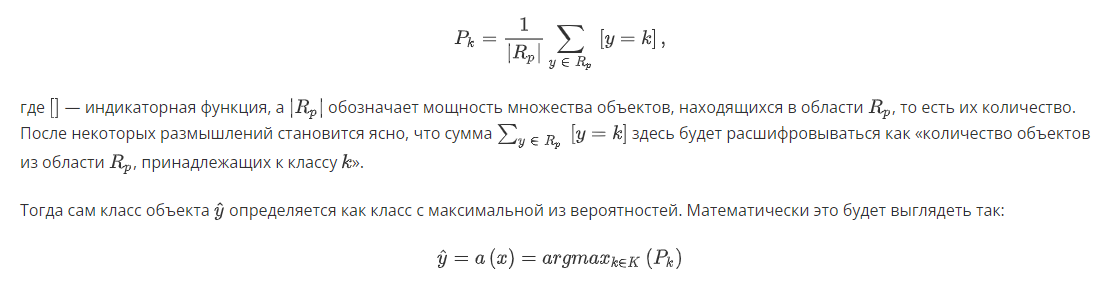

Давайте посмотрим на пример разделяющей поверхности дерева решений в случае задачи классификации ↓

Воспользуемся данными о банкнотах из Banknote Authentication Dataset.

**Примечание.** *Данные были получены из изображений, которые соответствуют подлинным и поддельным образцам банкнот. Для оцифровки использовалась промышленная камера, обычно используемая для проверки отпечатков. Конечные изображения имеют размер 400x400 пикселей.*

*Далее эти изображения были подвергнуты специальному **вейвлет-преобразованию**. Это преобразование, которое позволяет закодировать изображение в виде набора чисел. Если вам интересно подробнее изучить эту тему, рекомендуем прочесть данную статью.*

*Из преобразованных данных были извлечены различные статистические характеристики.*

В качестве примера для визуализации из всех характеристик, описывающих изображения банкнот, будем использовать:

+ Variance (дисперсию);
+ Skewness (асимметрию).

Наша цель — предсказать, является ли банкнота фальшивой (Class): 1 — фальшивая, 0 — подлинная.


Как обычно, подготовим обучающую выборку, отделив факторы X и целевую переменную y:

In [6]:
# Создаём обучающую выборку    
bill_data = pd.read_csv('data/bill_authentication.csv')
X = bill_data[['Variance', 'Skewness']]
y = bill_data['Class']

Создадим модель дерева решений для задачи регрессии (класс DecisionTreeClassifier из модуля tree библиотеки sklearn) с максимальной глубиной 4 и обучим её.

In [7]:
# Инициализируем модель дерева решений с максимальной глубиной 4 и обучаем её
dt_clf = tree.DecisionTreeClassifier(max_depth=4)
dt_clf.fit(X.values, y)

DecisionTreeClassifier(max_depth=4)

Отследить то, как дерево решений строит свой прогноз, нам может помочь граф обученного дерева решений:

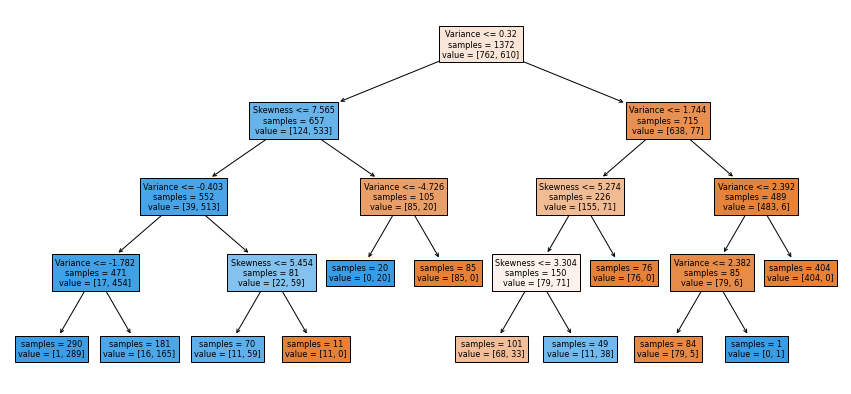

In [8]:
# Визуализируем дерево решений в виде графа
fig = plt.figure(figsize=(15, 7))
tree_graph = tree.plot_tree(
    dt_clf, #дерево решений
    feature_names=X.columns, #имена факторов
    filled=True, #расцветка
    impurity=False, #отображать ли неоднородность
);

Построим диаграмму рассеяния и визуализируем то, как дерево решений разделяет пространство факторов на прямоугольные области. Для этого шага мы реализовали функцию функцию plot_decision_bound_classification():

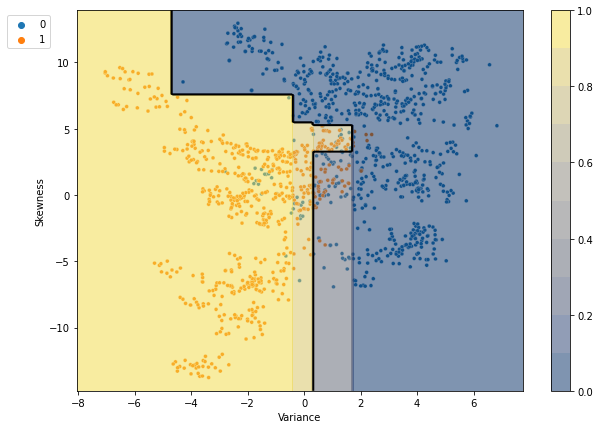

In [9]:
def plot_decision_bound_classification(X, y, model, fig):
    xx1, xx2 = np.meshgrid(
        np.arange(X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1, 0.1),
        np.arange(X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1, 0.1)
    )
    X_net = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])
    probs = model.predict_proba(X_net)[:, 1]
    probs = probs.reshape(xx1.shape)
    
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y, s=15, alpha=1)
    contour = plt.contourf(xx1, xx2, probs, 10, cmap='cividis', alpha=0.5)
    bound = plt.contour(xx1, xx2, probs, [0.5], linewidths=2, colors='black');
    fig.colorbar(contour)
    plt.legend(bbox_to_anchor=(-0.05, 1))
# Визуализируем разделяющую поверхность дерева решений
fig = plt.figure(figsize = (10, 7))
plot_decision_bound_classification(X, y, dt_clf, fig)

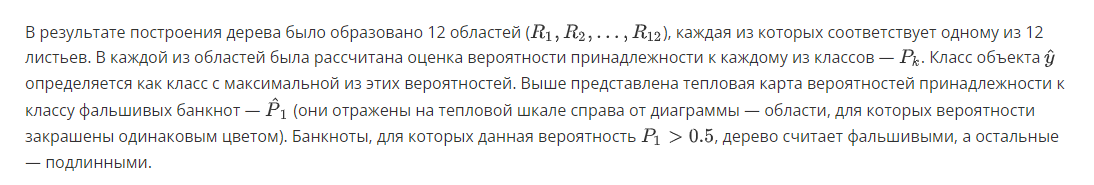

---

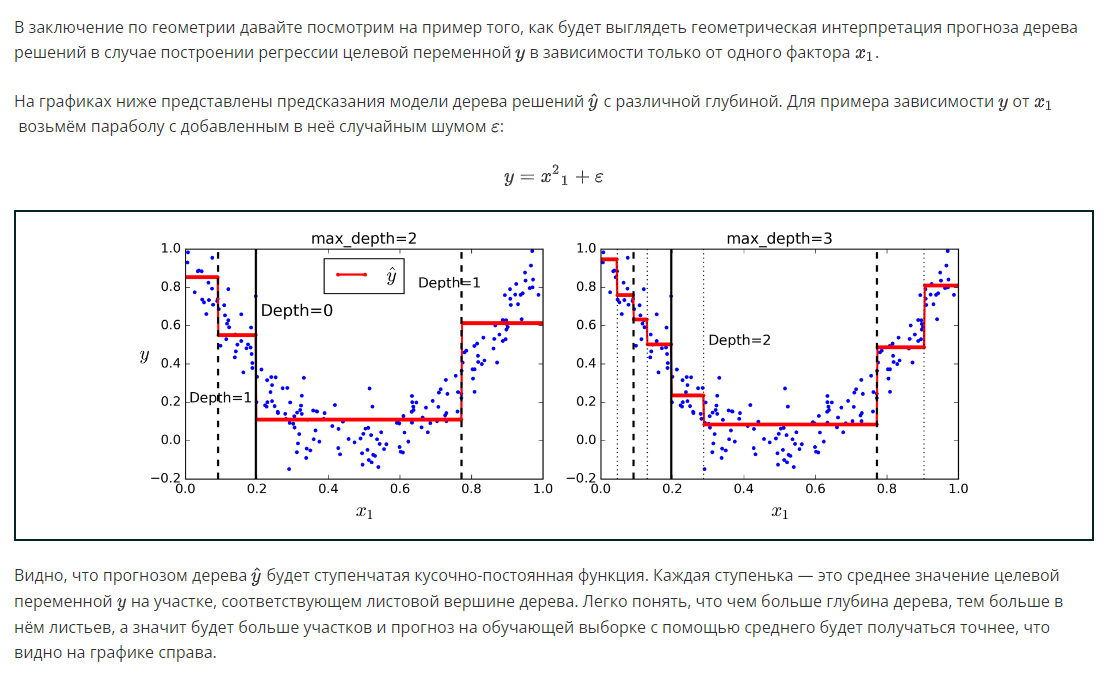

## Задание 2.4

Представим, что мы обучили некоторое дерево решений для задачи классификации на два класса: красные и синие точки. В результате обученное дерево разбило пространство факторов на три прямоугольные области $R_1$, $R_2$ и $R_3$. В таблице указано количество красных и синих точек в каждой из областей:

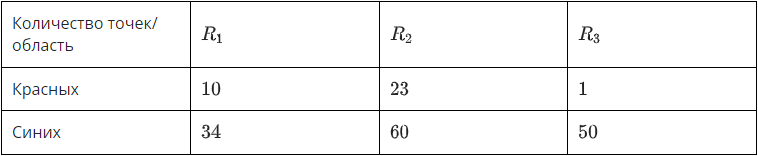

Определите вероятность принадлежности к классу синих точек для объектов из области $R_2$. Ответ округлите до двух знаков после точки-разделителя.

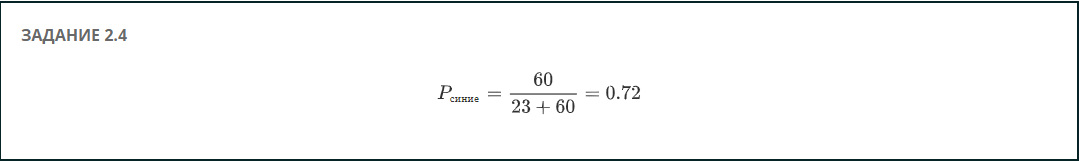

## Задание 2.5

Ниже представлены геометрические интерпретации трёх деревьев решений различной глубины. Все три модели решают одну и ту же задачу классификации выборки на два класса (синие и оранжевые точки).

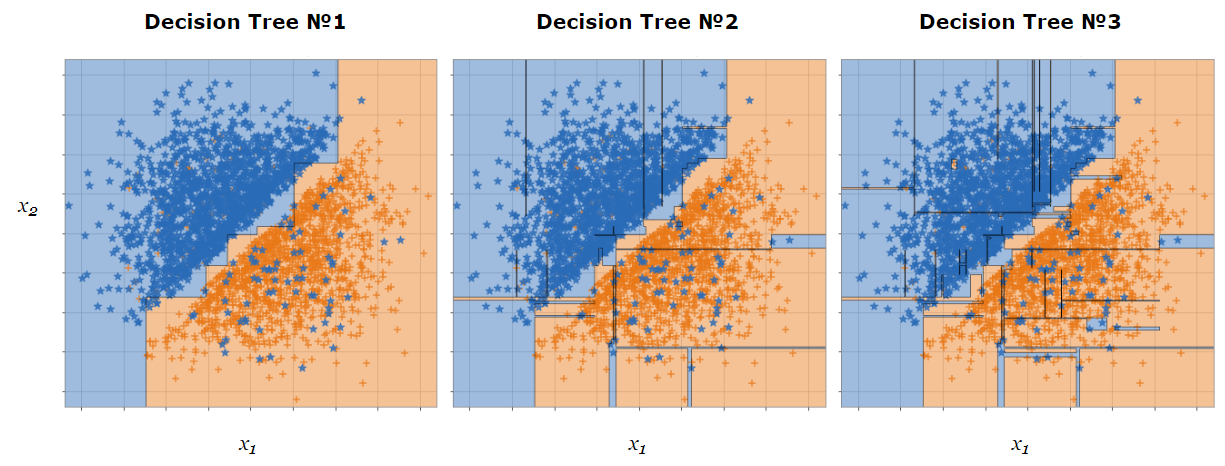

Какое из представленных деревьев самое глубокое?

+ Decision Tree №3


## Задание 2.6

Ниже представлены геометрические интерпретации двух деревьев решений различной глубины. Обе модели решают одну и ту же задачу регрессии.

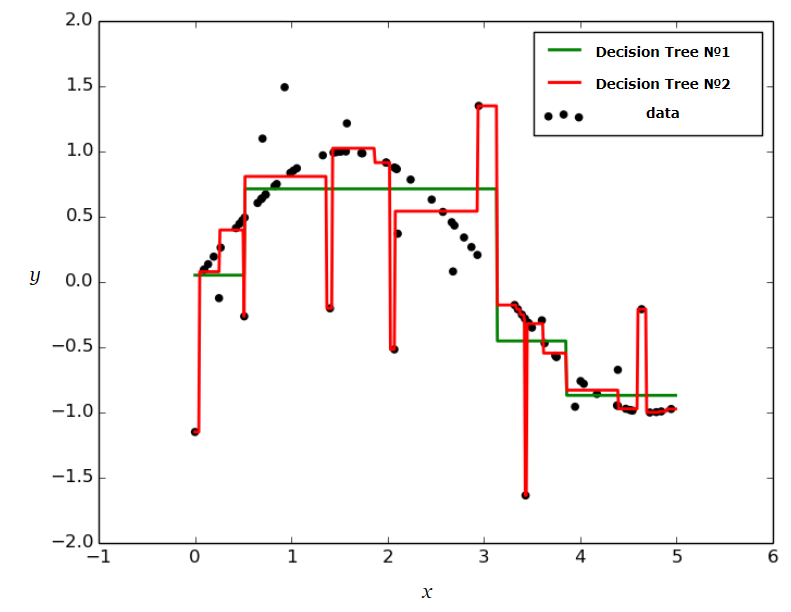

Какое из представленных деревьев самое глубокое?

+ Decision Tree №2

# **СВОЙСТВА АЛГОРИТМА ДЕРЕВА РЕШЕНИЙ**

Подведём промежуточный итог. В начале юнита мы обозначили нашу глобальную цель — найти такую функцию $a(x)$, которая связывает два множества $X$ (множество объектов) и $Y$ (множество примеров).

Задав структуру дерева решений, а также решающие правила $B_v (x_j, t)$ в каждой из вершин, мы решим нашу задачу. Полученное дерево как раз и станет нашей функцией $a(x)$.

Да, дерево решений — это не классическая для нас аналитическая функция, как $x^2$ или $e^x$, к которым мы привыкли, решая задачи в модулях по математическому анализу. Это отдельный вид функций, представленных в виде последовательности действий — алгоритма.

Схематично связь между множествами $X$ и $Y$ можно представить следующим образом:

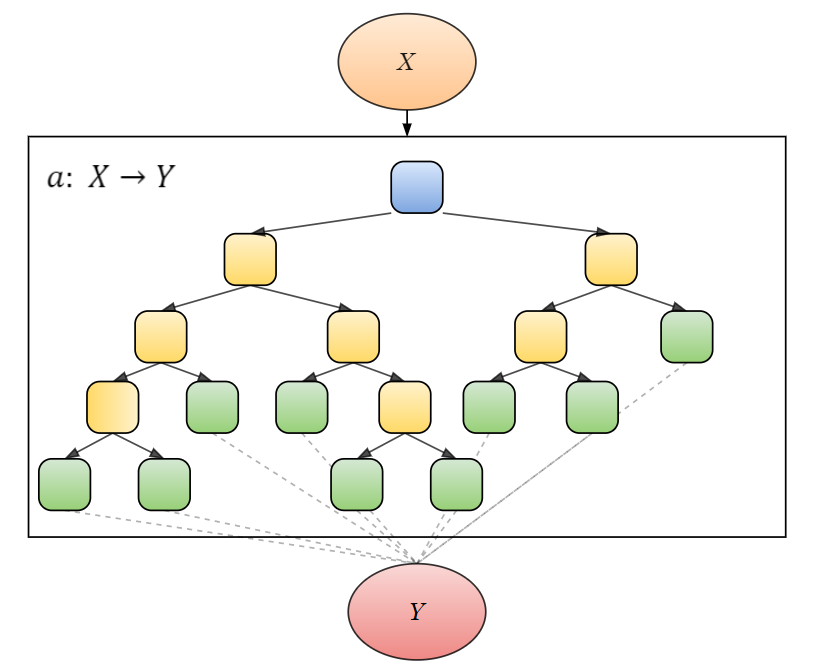

## Из структуры дерева решений следует **несколько интересных свойств:**

1. Полученная функция $a(x)$ является кусочно-постоянной, а у таких функций производная равна нулю во всех точках, где задана функция. Следовательно, при поиске оптимального решения можно забыть о градиентных методах, таких как SGD.

2. В случае задачи регрессии дерево решений (в отличие от, например, линейной регрессии) не может предсказывать значения целевой переменной за границами области значений обучающей выборки (на самом деле может, но для этого нужны специальные манипуляции над данными, которые не входят в рамки данного модуля).

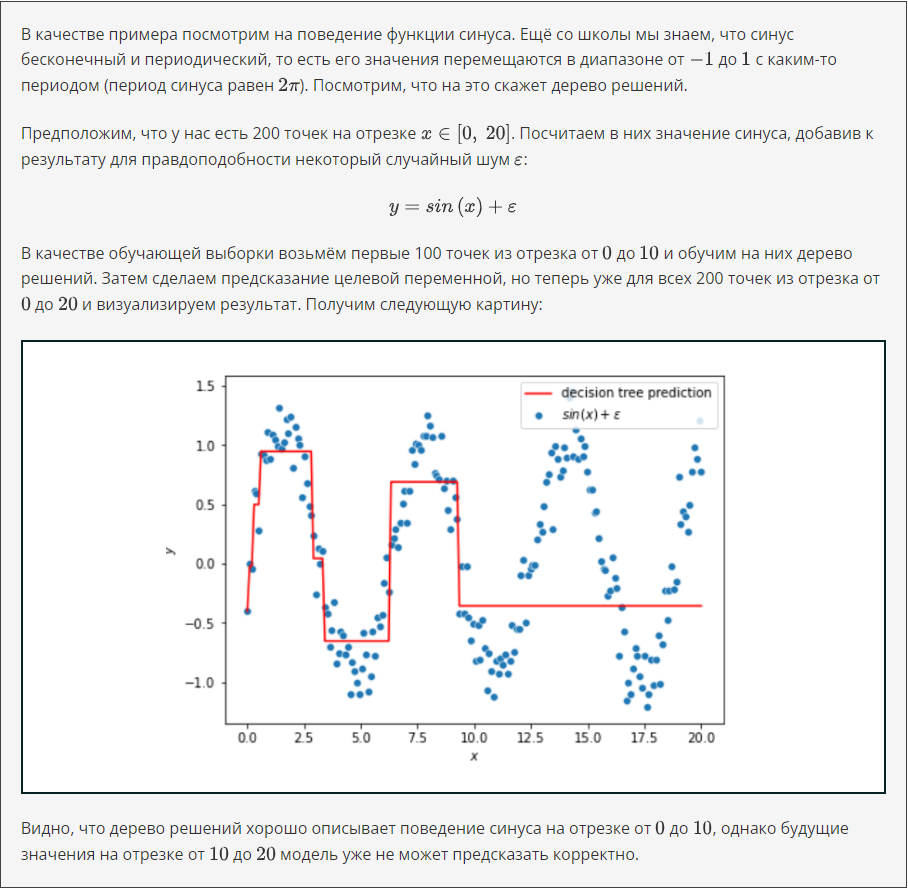

3. Дерево решений способно идеально приблизить обучающую выборку, но при этом ничего не выучить: для этого достаточно построить такое дерево, в каждый лист которого будет попадать только один объект.

Такая модель будет обладать идеальным качеством на обучающей выборке, однако при её использовании на реальных данных качество будет низким. Иначе говоря, модель будет переобученной.

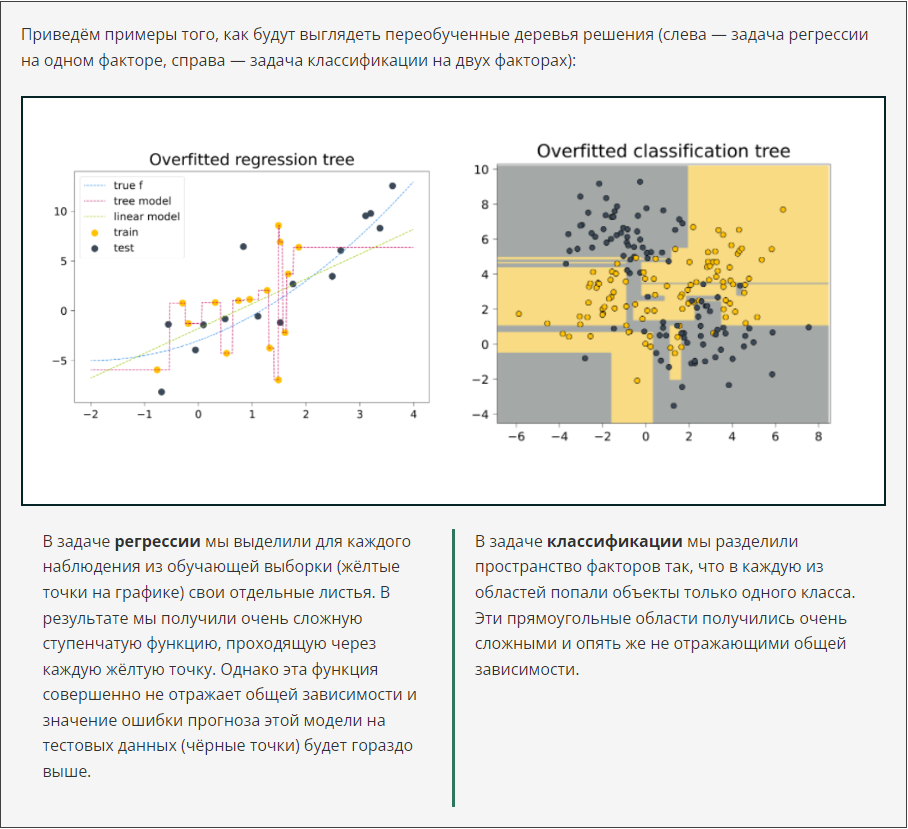